In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set()

df = pd.read_csv('accelerometer.csv')
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [2]:
df.shape

(153000, 5)

In [3]:
#查看missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153000 entries, 0 to 152999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   wconfid  153000 non-null  int64  
 1   pctid    153000 non-null  int64  
 2   x        153000 non-null  float64
 3   y        153000 non-null  float64
 4   z        153000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.8 MB


In [4]:
df.groupby(['wconfid', 'pctid']).count()

x     y     z
wconfid pctid                  
1       20     3000  3000  3000
        25     3000  3000  3000
        30     3000  3000  3000
        35     3000  3000  3000
        40     3000  3000  3000
        45     3000  3000  3000
        50     3000  3000  3000
        55     3000  3000  3000
        60     3000  3000  3000
        65     3000  3000  3000
        70     3000  3000  3000
        75     3000  3000  3000
        80     3000  3000  3000
        85     3000  3000  3000
        90     3000  3000  3000
        95     3000  3000  3000
        100    3000  3000  3000
2       20     3000  3000  3000
        25     3000  3000  3000
        30     3000  3000  3000
        35     3000  3000  3000
        40     3000  3000  3000
        45     3000  3000  3000
        50     3000  3000  3000
        55     3000  3000  3000
        60     3000  3000  3000
        65     3000  3000  3000
        70     3000  3000  3000
        75     3000  3000  3000
        80     3000  3000  3000
        85     3000  3000  3000
        90     3000  3000  3000
        95     3000  3000  3000
        100    3000  3000  3000
3       20     3000  3000  3000
        25     3000  3000  3000
        30     3000  3000  3000
        35     3000  3000  3000
        40     3000  3000  3000
        45     3000  3000  3000
        50     3000  3000  3000
        55     3000  3000  3000
        60     3000  3000  3000
        65     3000  3000  3000
        70     3000  3000  3000
        75     3000  3000  3000
        80     3000  3000  3000
        85     3000  3000  3000
        90     3000  3000  3000
        95     3000  3000  3000
        100    3000  3000  3000

### 創建總加速度（L2）

In [5]:
def l2(s):
    return (s.loc['x']**2 + s.loc['y'] + s.loc['z']**2)**0.5

df['l2'] = df.apply(l2, axis=1)
df.head()

C:\Users\Chen\AppData\Local\Temp\ipykernel_8828\1923772492.py:2: RuntimeWarning: invalid value encountered in scalar power
  return (s.loc['x']**2 + s.loc['y'] + s.loc['z']**2)**0.5


,wconfid,pctid,x,y,z,l2
0,1,20,1.004,0.090,-0.125,1.055292
1,1,20,1.004,-0.043,-0.125,0.990273
2,1,20,0.969,0.090,-0.121,1.021568
3,1,20,0.973,-0.012,-0.137,0.976472
4,1,20,1.000,-0.016,-0.121,0.999320


In [6]:
#相關性
#corr_matrix = df.corr()
#corr_matrix["l2"].sort_values(ascending=False)

In [7]:
from sklearn.preprocessing import LabelEncoder
#資料型態轉換
le=LabelEncoder()
for col in df[["wconfid","pctid","x","y","z","l2"]]:
    df[col]=le.fit_transform(df[col]).astype(np.int64)

In [8]:
# 標準化
mean = df.mean(axis=0)
df -= mean
std = df.std(axis=0)
df /= std

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# Load the dataset
X1 = df.drop('wconfid', axis=1)   # the accelerometer data
y1 = df['wconfid']   # the activity labels
X2 = df.drop('l2', axis=1)   # the accelerometer data
y2 = df['l2']   # the activity labels

In [10]:
X1

,pctid,x,y,z,l2
0,-1.632988,0.010289,0.116974,-0.014030,0.101391
1,-1.632988,0.010289,-0.073111,-0.014030,-0.554734
2,-1.632988,-0.036842,0.116974,-0.006381,-0.231456
3,-1.632988,-0.031605,-0.028385,-0.036980,-0.693186
4,-1.632988,0.005052,-0.033976,-0.006381,-0.458441
...,...,...,...,...,...
152995,1.632988,0.073129,0.116974,-0.281777,0.596376
152996,1.632988,-0.104919,0.044294,-0.021680,-0.952946
152997,1.632988,0.214521,-0.145790,-0.212928,0.658416
152998,1.632988,-0.083973,0.279105,-0.105829,0.060894


In [11]:
y1 = pd.get_dummies(y1)
X1

,pctid,x,y,z,l2
0,-1.632988,0.010289,0.116974,-0.014030,0.101391
1,-1.632988,0.010289,-0.073111,-0.014030,-0.554734
2,-1.632988,-0.036842,0.116974,-0.006381,-0.231456
3,-1.632988,-0.031605,-0.028385,-0.036980,-0.693186
4,-1.632988,0.005052,-0.033976,-0.006381,-0.458441
...,...,...,...,...,...
152995,1.632988,0.073129,0.116974,-0.281777,0.596376
152996,1.632988,-0.104919,0.044294,-0.021680,-0.952946
152997,1.632988,0.214521,-0.145790,-0.212928,0.658416
152998,1.632988,-0.083973,0.279105,-0.105829,0.060894


In [12]:
y1

,-1.224741,0.000000,1.224741
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
152995,0,0,1
152996,0,0,1
152997,0,0,1
152998,0,0,1


In [13]:
# Split the data into training, validation, and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15, random_state=42)
X1_train, X1_val, y1_train, y1_val = train_test_split(X1_train, y1_train, test_size=0.176465, random_state=42) # 0.176465 x 0.85 = 0.15

# Split the data into training, validation, and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.15, random_state=42)
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_train, y2_train, test_size=0.176465, random_state=42) # 0.176465 x 0.85 = 0.15

# Print the shapes of the resulting datasets
print("Training data shape:", X1_train.shape)
print("Validation data shape:", X1_val.shape)
print("Test data shape:", X1_test.shape)

# Print the shapes of the resulting datasets
print("Training data shape:", X2_train.shape)
print("Validation data shape:", X2_val.shape)
print("Test data shape:", X2_test.shape)

Training data shape: (107100, 5)
Validation data shape: (22950, 5)
Test data shape: (22950, 5)
Training data shape: (107100, 5)
Validation data shape: (22950, 5)
Test data shape: (22950, 5)


In [14]:
import tensorflow as tf
from tensorflow.keras import layers

def build_model1():
    model = tf.keras.Sequential()
    model.add(layers.Dense(64,kernel_initializer=tf.keras.initializers.GlorotNormal() , activation='relu', input_shape=(X1_train.shape[1],)))
    model.add(layers.Dense(64,kernel_initializer=tf.keras.initializers.GlorotNormal() , activation='relu'))
    model.add(layers.Dense(3, activation='softmax'))
    model.summary()
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),'accuracy'])
    return model

def build_model2():
    model = tf.keras.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(X2_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.summary()
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'mape'])
    return model

# Validation k-fold

In [17]:
'''import numpy as np

k = 4
num_val_samples = len(X1_train) // k
num_epochs = 130
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X1_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y1_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X1_train[:i * num_val_samples],
         X1_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y1_train[:i * num_val_samples],
         y1_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model1()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=1)
    # Evaluate the model on the validation data
    score= model.evaluate(val_data, val_targets)
    all_scores.append(score[3])'''

"import numpy as np\n\nk = 4\nnum_val_samples = len(X1_train) // k\nnum_epochs = 130\nall_scores = []\nfor i in range(k):\n    print('processing fold #', i)\n    # Prepare the validation data: data from partition # k\n    val_data = X1_train[i * num_val_samples: (i + 1) * num_val_samples]\n    val_targets = y1_train[i * num_val_samples: (i + 1) * num_val_samples]\n\n    # Prepare the training data: data from all other partitions\n    partial_train_data = np.concatenate(\n        [X1_train[:i * num_val_samples],\n         X1_train[(i + 1) * num_val_samples:]],\n        axis=0)\n    partial_train_targets = np.concatenate(\n        [y1_train[:i * num_val_samples],\n         y1_train[(i + 1) * num_val_samples:]],\n        axis=0)\n\n    # Build the Keras model (already compiled)\n    model = build_model1()\n    # Train the model (in silent mode, verbose=0)\n    model.fit(partial_train_data, partial_train_targets,\n              epochs=num_epochs, batch_size=1, verbose=1)\n    # Evaluate th

In [ ]:
#all_scores

In [ ]:
#np.mean(all_scores)

# Validation Classification

In [15]:
model1 = build_model1()
h1=model1.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=100, batch_size=1, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,739
Trainable params: 4,739
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
6694/6694 [==============================] - 41s 6ms/step - loss: 0.7251 - precision: 0.7299 - recall: 0.4732 - accuracy: 0.6195 - val_loss: 0.6727 - val_precision: 0.7467 - val_recall: 0.5463 - val_accuracy: 0.6623
Epoch 2/100
6694/6694 [==============================] - 42s 6ms/step - loss: 0.6764 - pre

Epoch 69/100
6694/6694 [==============================] - 41s 6ms/step - loss: 0.7053 - precision: 0.7168 - recall: 0.6059 - accuracy: 0.6706 - val_loss: 0.6753 - val_precision: 0.7212 - val_recall: 0.6261 - val_accuracy: 0.6824
Epoch 70/100
6694/6694 [==============================] - 41s 6ms/step - loss: 0.7047 - precision: 0.7127 - recall: 0.6048 - accuracy: 0.6683 - val_loss: 0.6853 - val_precision: 0.7110 - val_recall: 0.6151 - val_accuracy: 0.6738
Epoch 71/100
6694/6694 [==============================] - 41s 6ms/step - loss: 0.7060 - precision: 0.7141 - recall: 0.6029 - accuracy: 0.6683 - val_loss: 0.6986 - val_precision: 0.7204 - val_recall: 0.6132 - val_accuracy: 0.6759
Epoch 72/100
6694/6694 [==============================] - 41s 6ms/step - loss: 0.7067 - precision: 0.7148 - recall: 0.6045 - accuracy: 0.6699 - val_loss: 0.6820 - val_precision: 0.7204 - val_recall: 0.6116 - val_accuracy: 0.6766
Epoch 73/100
6694/6694 [==============================] - 41s 6ms/step - loss: 0.710

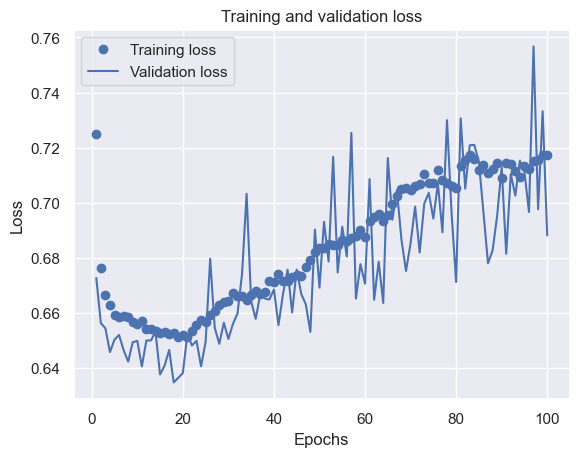

In [16]:
import matplotlib.pyplot as plt

loss = h1.history['loss']
val_loss = h1.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

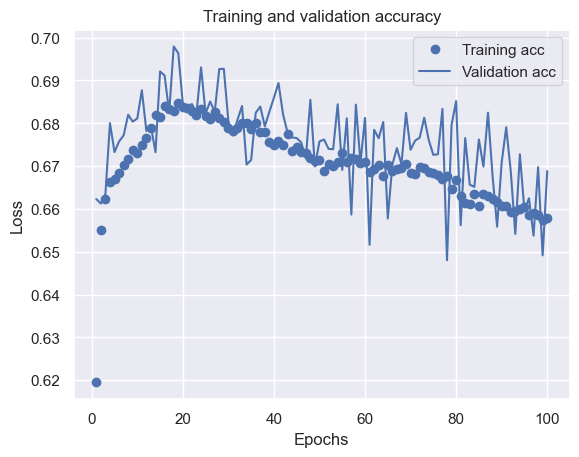

In [17]:
plt.clf()   # clear figure

acc = h1.history['accuracy']
val_acc = h1.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [15]:
model = build_model1()
history = model.fit(X1_train, y1_train, validation_data=(X1_val, y1_val), epochs=20, batch_size=16, verbose=1)
model.save('FFN1.h5')
# Evaluate the model
score= model.evaluate(X1_test, y1_test, verbose=1)
print('score:', score)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,739
Trainable params: 4,739
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
6694/6694 [==============================] - 43s 6ms/step - loss: 0.7165 - precision: 0.7340 - recall: 0.4857 - accuracy: 0.6280 - val_loss: 0.6752 - val_precision: 0.7272 - val_recall: 0.5457 - val_accuracy: 0.6522
Epoch 2/20
6694/6694 [==============================] - 43s 6ms/step - loss: 0.6753 - preci

In [16]:
model = tf.keras.models.load_model('FFN1.h5')
predict = model.evaluate(X1_test, y1_test)

F1 = 2 * (predict[1] * predict[2]) / (predict[1] + predict[2])
print('Loss : ', predict[0])
print('Precision : ', predict[1])
print('Recall : ', predict[2])
print('F1 : ',F1)

718/718 [==============================] - 3s 4ms/step - loss: 0.6680 - precision: 0.7158 - recall: 0.6014 - accuracy: 0.6687
Loss :  0.6679967045783997
Precision :  0.7157824039459229
Recall :  0.6013507843017578
F1 :  0.6535957241726367


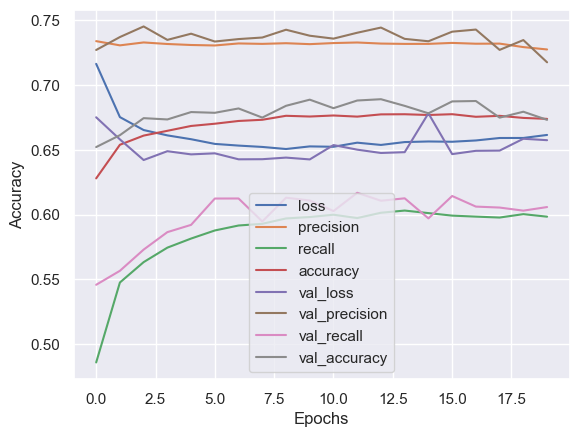

In [17]:
pd.DataFrame(history.history).plot()
#plt.plot(history.history['precision_1'], label='precision')
#plt.plot(F1, label='F1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Validation k-fold

In [18]:
import numpy as np

k = 4
num_val_samples = len(X2_train) // k
num_epochs = 130
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = X2_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y2_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X2_train[:i * num_val_samples],
         X2_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y2_train[:i * num_val_samples],
         y2_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model2()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=8, verbose=1)
    # Evaluate the model on the validation data
    score= model.evaluate(val_data, val_targets)
    all_scores.append(score[1])

processing fold # 0
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                384       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/130
10041/10041 [==============================] - 51s 5ms/step - loss: 0.1590 - mae: 0.1745 - mape: 463.3881
Epoch 2/130
10041/10041 [==============================] - 50s 5ms/step - loss: 0.0829 - mae: 0.1120 - mape: 87.9925
Epoch 3/130
10041/10041 [==============================] - 50

837/837 [==============================] - 2s 2ms/step - loss: 0.0157 - mae: 0.0379 - mape: 13.8425
processing fold # 1
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                384       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/130
10041/10041 [==============================] - 42s 4ms/step - loss: 0.1523 - mae: 0.1717 - mape: 658.3389
Epoch 2/130
10041/10041 [==============================] - 41s 4ms/step - loss

10041/10041 [==============================] - 41s 4ms/step - loss: 0.0183 - mae: 0.0356 - mape: 107.4608
Epoch 130/130
837/837 [==============================] - 2s 2ms/step - loss: 0.0201 - mae: 0.0585 - mape: 38.8136
processing fold # 2
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                384       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/130
10041/10041 [==============================] - 42s 4ms/step - lo

10041/10041 [==============================] - 42s 4ms/step - loss: 0.0160 - mae: 0.0341 - mape: 23.8472
Epoch 130/130
837/837 [==============================] - 2s 2ms/step - loss: 0.0176 - mae: 0.0347 - mape: 256.3829
processing fold # 3
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                384       
                                                                 
 dense_19 (Dense)            (None, 64)                4160      
                                                                 
 dense_20 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/130
10041/10041 [==============================] - 42s 4ms/step - lo

10041/10041 [==============================] - 42s 4ms/step - loss: 0.0194 - mae: 0.0318 - mape: 24.5356
Epoch 129/130
10041/10041 [==============================] - 42s 4ms/step - loss: 0.0193 - mae: 0.0318 - mape: 326.1976
Epoch 130/130
837/837 [==============================] - 2s 2ms/step - loss: 0.0258 - mae: 0.0340 - mape: 18.6805


In [19]:
all_scores

[0.037915732711553574,
 0.058539893478155136,
 0.03474387899041176,
 0.03396327793598175]

In [20]:
np.mean(all_scores)

0.041290695779025555

In [21]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [22]:
num_epochs = 150
all_mae_histories = []
for i in range(4):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val2data = X2_train[i * num_val_samples: (i + 1) * num_val_samples]
    val2targets = y2_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [X2_train[:i * num_val_samples],
         X2_train[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [y2_train[:i * num_val_samples],
         y2_train[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model2()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=8, verbose=1)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
10041/10041 [==============================] - 52s 5ms/step - loss: 0.1569 - mae: 0.1736 - mape: 334.5856 - val_loss: 0.1068 - val_mae: 0.1151 - val_mape: 51.6247
Epoch 2/150
10041/10041 [==============================] - 50s 5ms/step - loss: 0.0935 - mae: 0.1164 - mape: 735.5781 - val

Epoch 43/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0276 - mae: 0.0488 - mape: 1063.8646 - val_loss: 0.0279 - val_mae: 0.0539 - val_mape: 26.1572
Epoch 44/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0251 - mae: 0.0479 - mape: 301.5531 - val_loss: 0.0252 - val_mae: 0.0472 - val_mape: 17.9651
Epoch 45/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0250 - mae: 0.0479 - mape: 466.9004 - val_loss: 0.0644 - val_mae: 0.0701 - val_mape: 18.3569
Epoch 46/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0252 - mae: 0.0472 - mape: 206.7770 - val_loss: 0.0405 - val_mae: 0.0540 - val_mape: 23.5645
Epoch 47/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0251 - mae: 0.0474 - mape: 496.9325 - val_loss: 0.0159 - val_mae: 0.0402 - val_mape: 21.8800
Epoch 48/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0236 - mae: 0.0465 - mape: 380.7760 

10041/10041 [==============================] - 46s 5ms/step - loss: 0.0209 - mae: 0.0393 - mape: 61.4670 - val_loss: 0.0209 - val_mae: 0.0476 - val_mape: 20.1954
Epoch 136/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0221 - mae: 0.0399 - mape: 386.1902 - val_loss: 0.0214 - val_mae: 0.0418 - val_mape: 31.8491
Epoch 137/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0200 - mae: 0.0394 - mape: 112.4056 - val_loss: 0.0203 - val_mae: 0.0405 - val_mape: 23.1999
Epoch 138/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0224 - mae: 0.0402 - mape: 724.8259 - val_loss: 0.0158 - val_mae: 0.0490 - val_mape: 52.2731
Epoch 139/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0208 - mae: 0.0395 - mape: 359.8492 - val_loss: 0.0325 - val_mae: 0.0546 - val_mape: 29.5044
Epoch 140/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0211 - mae: 0.0393 - mape: 278.8560 - val_loss

Epoch 27/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0205 - mae: 0.0416 - mape: 282.5804 - val_loss: 0.0169 - val_mae: 0.0373 - val_mape: 25.4017
Epoch 28/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0205 - mae: 0.0410 - mape: 235.7883 - val_loss: 0.0232 - val_mae: 0.0392 - val_mape: 16.2793
Epoch 29/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0191 - mae: 0.0397 - mape: 429.1903 - val_loss: 0.0197 - val_mae: 0.0327 - val_mape: 11.0715
Epoch 30/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0203 - mae: 0.0403 - mape: 54.2515 - val_loss: 0.0180 - val_mae: 0.0351 - val_mape: 14.0882
Epoch 31/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0192 - mae: 0.0396 - mape: 129.5602 - val_loss: 0.0160 - val_mae: 0.0374 - val_mape: 18.9743
Epoch 32/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0182 - mae: 0.0383 - mape: 487.6792 - 

10041/10041 [==============================] - 47s 5ms/step - loss: 0.0219 - mae: 0.0336 - mape: 435.0491 - val_loss: 0.0203 - val_mae: 0.0441 - val_mape: 34.3159
Epoch 120/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0229 - mae: 0.0340 - mape: 239.1348 - val_loss: 0.0221 - val_mae: 0.0323 - val_mape: 18.0195
Epoch 121/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0236 - mae: 0.0345 - mape: 312.3606 - val_loss: 0.0235 - val_mae: 0.0343 - val_mape: 20.9299
Epoch 122/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0231 - mae: 0.0342 - mape: 206.0219 - val_loss: 0.0254 - val_mae: 0.0401 - val_mape: 33.2651
Epoch 123/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0218 - mae: 0.0339 - mape: 58.7182 - val_loss: 0.0267 - val_mae: 0.0339 - val_mape: 21.4930
Epoch 124/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0216 - mae: 0.0341 - mape: 409.5353 - val_loss

Epoch 11/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0307 - mae: 0.0534 - mape: 24.0750 - val_loss: 0.0310 - val_mae: 0.0495 - val_mape: 27.2180
Epoch 12/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0280 - mae: 0.0513 - mape: 19.9739 - val_loss: 0.0275 - val_mae: 0.0615 - val_mape: 39.8692
Epoch 13/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0270 - mae: 0.0497 - mape: 20.6446 - val_loss: 0.0248 - val_mae: 0.0543 - val_mape: 19.2558
Epoch 14/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0255 - mae: 0.0480 - mape: 20.5784 - val_loss: 0.0258 - val_mae: 0.0447 - val_mape: 26.7834
Epoch 15/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0240 - mae: 0.0474 - mape: 21.5339 - val_loss: 0.0218 - val_mae: 0.0506 - val_mape: 39.0594
Epoch 16/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0239 - mae: 0.0468 - mape: 21.3068 - val_l

Epoch 58/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0164 - mae: 0.0349 - mape: 19.7038 - val_loss: 0.0184 - val_mae: 0.0386 - val_mape: 12.4093
Epoch 59/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0168 - mae: 0.0349 - mape: 21.1603 - val_loss: 0.0206 - val_mae: 0.0451 - val_mape: 34.9418
Epoch 60/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0166 - mae: 0.0349 - mape: 21.5854 - val_loss: 0.0187 - val_mae: 0.0322 - val_mape: 12.9414
Epoch 61/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0151 - mae: 0.0343 - mape: 18.2228 - val_loss: 0.0181 - val_mae: 0.0334 - val_mape: 26.2489
Epoch 62/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0172 - mae: 0.0352 - mape: 17.9947 - val_loss: 0.0156 - val_mae: 0.0262 - val_mape: 11.4117
Epoch 63/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0147 - mae: 0.0344 - mape: 22.2880 - val_l

Epoch 105/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0196 - mae: 0.0343 - mape: 19.0373 - val_loss: 0.0180 - val_mae: 0.0303 - val_mape: 12.0395
Epoch 106/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0182 - mae: 0.0335 - mape: 22.8957 - val_loss: 0.0199 - val_mae: 0.0398 - val_mape: 29.2762
Epoch 107/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0177 - mae: 0.0334 - mape: 18.6777 - val_loss: 0.0168 - val_mae: 0.0272 - val_mape: 15.6290
Epoch 108/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0181 - mae: 0.0337 - mape: 17.8532 - val_loss: 0.0141 - val_mae: 0.0272 - val_mape: 20.2060
Epoch 109/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0183 - mae: 0.0338 - mape: 17.2685 - val_loss: 0.0183 - val_mae: 0.0350 - val_mape: 13.0733
Epoch 110/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0183 - mae: 0.0339 - mape: 19.7402 -

 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                384       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.1712 - mae: 0.1831 - mape: 176.2592 - val_loss: 0.1086 - val_mae: 0.1548 - val_mape: 87.0856
Epoch 2/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0941 - mae: 0.1184 - mape: 614.8281 - val_loss: 0.0779 - val_mae: 0.1131 - val_mape: 56.1671
Epoch 3/150
10041/10041 [=============================

Epoch 90/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0166 - mae: 0.0352 - mape: 219.3370 - val_loss: 0.0211 - val_mae: 0.0585 - val_mape: 42.1395
Epoch 91/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0163 - mae: 0.0352 - mape: 376.8819 - val_loss: 0.0172 - val_mae: 0.0347 - val_mape: 22.0603
Epoch 92/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0160 - mae: 0.0353 - mape: 73.2291 - val_loss: 0.0189 - val_mae: 0.0304 - val_mape: 21.6045
Epoch 93/150
10041/10041 [==============================] - 47s 5ms/step - loss: 0.0165 - mae: 0.0349 - mape: 67.1252 - val_loss: 0.0165 - val_mae: 0.0392 - val_mape: 31.1393
Epoch 94/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0170 - mae: 0.0352 - mape: 121.3954 - val_loss: 0.0177 - val_mae: 0.0495 - val_mape: 27.5291
Epoch 95/150
10041/10041 [==============================] - 46s 5ms/step - loss: 0.0164 - mae: 0.0350 - mape: 548.2291 - v

In [23]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# plot

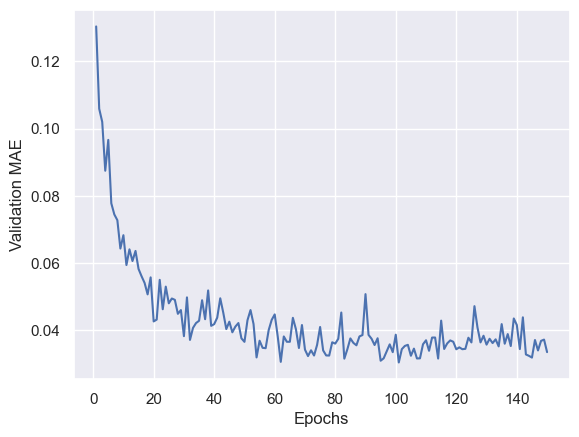

In [24]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# smoothcurve

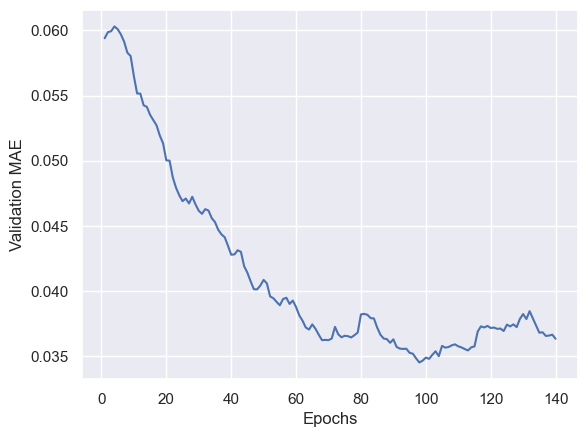

In [25]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# train

In [26]:
model2 = build_model2()
history2 = model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=100, batch_size=16, verbose=1)
model2.save('FFN2.h5')
# Evaluate the model
score2= model2.evaluate(X2_test, y2_test, verbose=1)
print('mse:', score2[0])
print('mae:', score2[1])
print('mape:', score2[2])


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                384       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,609
Trainable params: 4,609
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
6694/6694 [==============================] - 35s 5ms/step - loss: 0.1531 - mae: 0.1784 - mape: 608.4128 - val_loss: 0.0855 - val_mae: 0.1155 - val_mape: 47.6809
Epoch 2/100
6694/6694 [==============================] - 32s 5ms/step - loss: 0.0774 - mae: 0.1125 - mape: 739.3278 - val_loss: 0.0668 - val_ma

6694/6694 [==============================] - 30s 4ms/step - loss: 0.0135 - mae: 0.0295 - mape: 139.0196 - val_loss: 0.0189 - val_mae: 0.0354 - val_mape: 14.9445
Epoch 91/100
6694/6694 [==============================] - 30s 4ms/step - loss: 0.0129 - mae: 0.0296 - mape: 288.6629 - val_loss: 0.0149 - val_mae: 0.0526 - val_mape: 37.6770
Epoch 92/100
6694/6694 [==============================] - 30s 5ms/step - loss: 0.0126 - mae: 0.0294 - mape: 178.8315 - val_loss: 0.0154 - val_mae: 0.0264 - val_mape: 13.9284
Epoch 93/100
6694/6694 [==============================] - 30s 5ms/step - loss: 0.0127 - mae: 0.0293 - mape: 82.8139 - val_loss: 0.0195 - val_mae: 0.0304 - val_mape: 12.3607
Epoch 94/100
6694/6694 [==============================] - 30s 4ms/step - loss: 0.0123 - mae: 0.0290 - mape: 226.7743 - val_loss: 0.0195 - val_mae: 0.0401 - val_mape: 25.1307
Epoch 95/100
6694/6694 [==============================] - 30s 5ms/step - loss: 0.0124 - mae: 0.0291 - mape: 151.6746 - val_loss: 0.0156 - val_ma

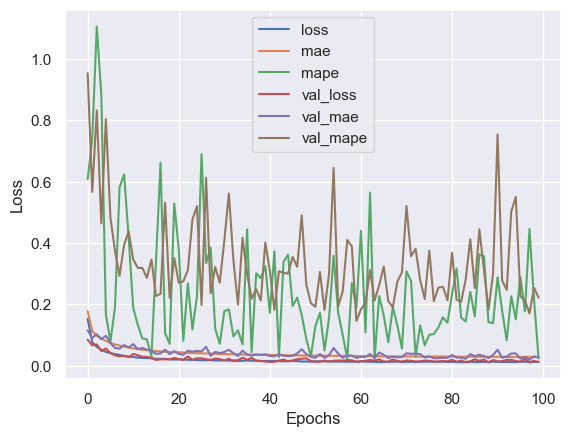

In [30]:
#history2.history['mape']=list(map(lambda x:x/1000, history2.history['mape']))
#history2.history['val_mape']=list(map(lambda x:x/50, history2.history['val_mape']))
pd.DataFrame(history2.history).plot()
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.gca().set_ylim(0, 1)
plt.show()